In [2]:
import numpy as np # линейная алгебра
import seaborn as sns # визуализация

import math # математические функции
import random # генерация случайных чисел

# Лабораторная работа №3

# Методы восстановления плотности

# Задание на лабораторную работу:
# 1. Сгенерировать на плоскости по 3-4 точки разных классов методом sclearn, восстановить плотность, нарисовать ядерную оценку.
# 2. Взять табличный dataset (например pandas), где есть числовые признаки и они распределены, восстановить плотность на реальных данных.

## 1 часть

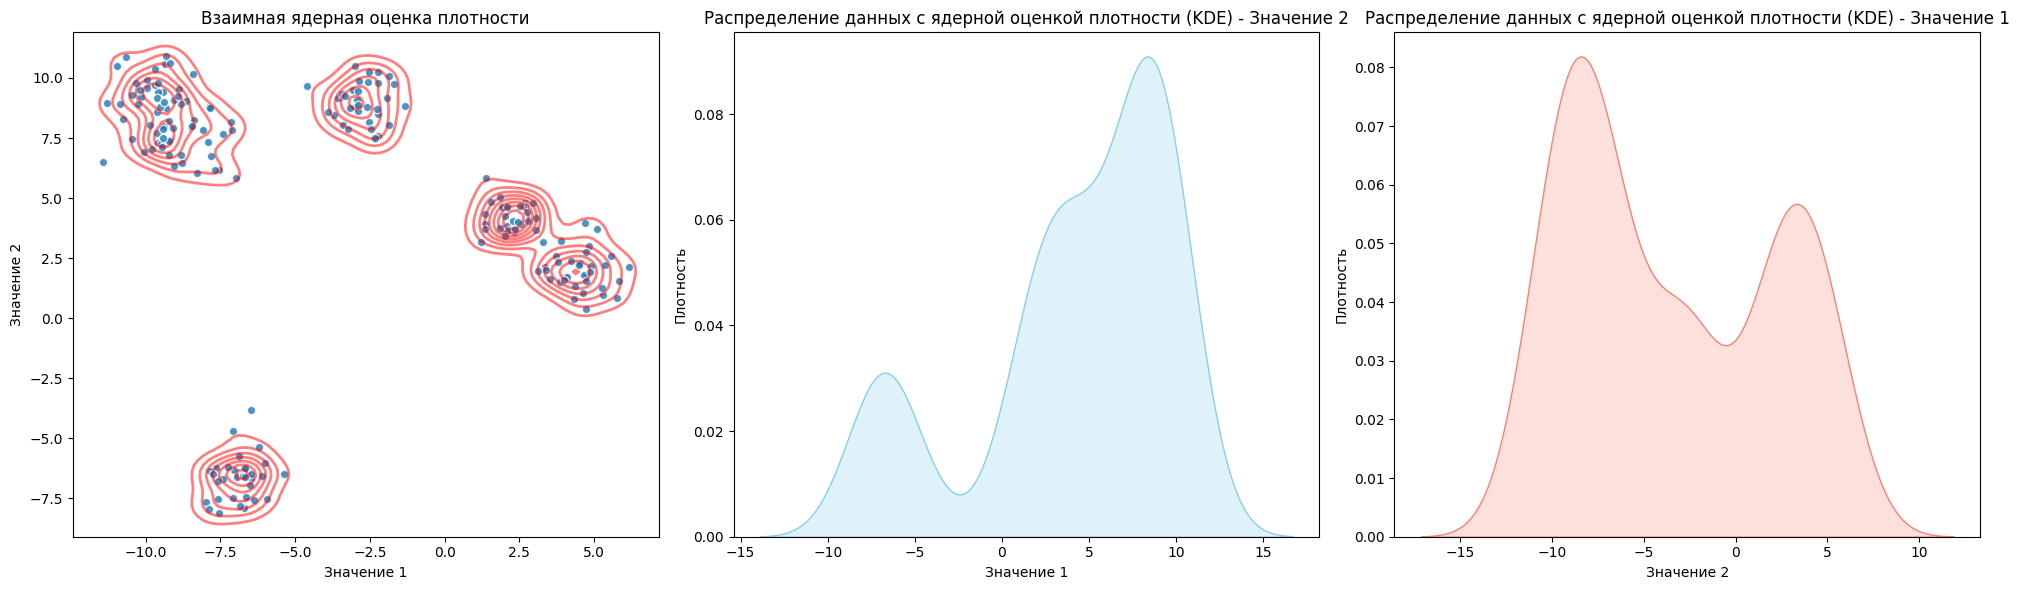

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs # Генерация данных
from sklearn.neighbors import KernelDensity # Ядерная оценка плотности

# Генерация данных с помощью make_blobs (Значение 1, Значение 2 и номер кластера (0, 1, 2, 3, 4, 5)
X, cluster = make_blobs(n_samples=200, centers=6, random_state=42, cluster_std=0.8) # 200 точек, 6 центров, 0.8 - стандартное отклонение

# Восстановление плотности с использованием ядерной оценки плотности (Kernel Density Estimation)
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KernelDensity.html
kde = KernelDensity(kernel='gaussian', bandwidth=0.5) # Гауссовское ядро, ширина ядра 0.5
kde.fit(X) # Обучение

# Создание сетки для отображения ядерной оценки плотности
# https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # Минимальное и максимальное значение по первой компоненте
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 # Минимальное и максимальное значение по второй компоненте
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100)) # Создание сетки
zz = np.exp(kde.score_samples(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape) # Оценка плотности

# Отображение данных и ядерной оценки плотности
plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], alpha=0.8, edgecolors='w') # Данные
plt.contour(xx, yy, zz, levels=8, linewidths=2, colors='r', alpha=0.5) # Ядерная оценка плотности
plt.title('Взаимная ядерная оценка плотности')
plt.xlabel('Значение 1')
plt.ylabel('Значение 2')


plt.subplot(1, 3, 2)
sns.kdeplot(
            x=X[:, 1],
            fill=True, color='skyblue', levels=10, label='Ядерная оценка плотности')

plt.title('Распределение данных с ядерной оценкой плотности (KDE) - Значение 2')
plt.xlabel('Значение 1')
plt.ylabel('Плотность')


plt.subplot(1, 3, 3)
sns.kdeplot(
            x=X[:, 0],
            fill=True, color='salmon', levels=10, label='Ядерная оценка плотности')

plt.title('Распределение данных с ядерной оценкой плотности (KDE) - Значение 1')
plt.xlabel('Значение 2')
plt.ylabel('Плотность')

plt.tight_layout()
plt.show()

## 2 часть

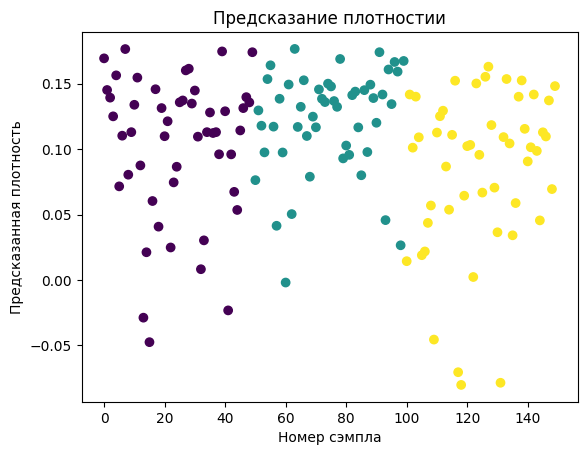

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler # Стандартизация данных
from sklearn.model_selection import GridSearchCV # Поиск по сетке 
from sklearn.ensemble import IsolationForest # Метод Isolation Forest

# Загрузка реальных данных (пример с Iris-датасетом)
# https://archive.ics.uci.edu/ml/datasets/iris
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
iris.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Выбор числовых признаков
numeric_features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X_real = iris[numeric_features]

# Стандартизация данных (приведение к нулевому среднему и единичной дисперсии)
scaler = StandardScaler()
X_real_scaled = scaler.fit_transform(X_real) # Обучение и применение преобразования

# Описание: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.IsolationForest.html
# Восстановление плотности с использованием Isolation Forest
isoforest = IsolationForest(contamination=0.05) # 5% аномалий
isoforest.fit(X_real_scaled) # Обучение

# Предсказание "аномальности" (1 - нормальный объект, -1 - аномальный объект)
density_prediction = isoforest.decision_function(X_real_scaled) # Предсказание

# Отображение предсказанных значений плотности
plt.scatter(iris.index, density_prediction, c=iris['class'].astype('category').cat.codes, cmap='viridis') # Предсказанные значения плотности
plt.title('Предсказание плотностии')
plt.xlabel('Номер сэмпла')
plt.ylabel('Предсказанная плотность')
plt.show()


In [8]:
density_prediction

array([ 0.16940587,  0.14522446,  0.13937596,  0.12509267,  0.15641304,
        0.07159077,  0.11031149,  0.17650627,  0.08050023,  0.11301318,
        0.13392256,  0.15468758,  0.08758381, -0.02875102,  0.0212375 ,
       -0.04746205,  0.06039166,  0.14580585,  0.04080326,  0.13140384,
        0.109905  ,  0.12133706,  0.02488685,  0.07462548,  0.08657767,
        0.13582219,  0.13723339,  0.16021129,  0.1614859 ,  0.13485813,
        0.14483213,  0.10956649,  0.00828345,  0.03033096,  0.11301318,
        0.1280595 ,  0.11235415,  0.11301318,  0.0961066 ,  0.17470125,
        0.12898761, -0.02318842,  0.09603403,  0.06739033,  0.05355705,
        0.11432288,  0.13139014,  0.13975665,  0.13574342,  0.17409232,
        0.07634416,  0.12962846,  0.11794481,  0.09755529,  0.15356259,
        0.16409892,  0.11722644,  0.04146926,  0.1385236 ,  0.09747804,
       -0.00190002,  0.1494118 ,  0.05040783,  0.17661081,  0.11700265,
        0.13238134,  0.15266438,  0.11008351,  0.07897403,  0.12